In [ ]:
• Dataset – 1000 entries of Telco Dataset
• Motivation – predict which customers is going to Churn
• XGBoostModel

In [9]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('Telco Data.csv')
df

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,unsubscribe
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308,NaN,NaN,2.015,NaN,4.159,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.482,3.033,NaN,2.725,3.575,4.913,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.899,2.890,NaN,3.409,NaN,4.754,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246,NaN,NaN,NaN,NaN,3.497,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.841,NaN,NaN,NaN,NaN,3.401,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,...,0,1,1.099,NaN,3.369,NaN,NaN,3.296,1,0
996,1,7,34,0,2,22,5,5,0,1,...,0,0,1.537,NaN,3.243,NaN,NaN,3.091,1,0
997,3,67,59,0,40,944,5,33,0,1,...,1,1,3.287,3.466,3.999,3.577,4.187,6.850,4,0
998,3,70,49,0,18,87,2,22,0,1,...,1,0,3.243,3.512,NaN,3.229,NaN,4.466,3,0


In [10]:
#finding attributes with missing cells
df.isna().sum() 

region           0
tenure           0
age              0
marital          0
address          0
income           0
education        0
employ           0
retire           0
gender           0
reside           0
tollfree         0
equip            0
callcard         0
wireless         0
longmon          0
tollmon          0
equipmon         0
cardmon          0
wiremon          0
longten          0
tollten          0
equipten         0
cardten          0
wireten          0
multline         0
voice            0
pager            0
internet         0
callid           0
callwait         0
forward          0
confer           0
ebill            0
loglong          0
logtoll        525
logequi        614
logcard        322
logwire        704
lninc            0
custcat          0
unsubscribe      0
dtype: int64

In [11]:
#further information on the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       1000 non-null   int64  
 1   tenure       1000 non-null   int64  
 2   age          1000 non-null   int64  
 3   marital      1000 non-null   int64  
 4   address      1000 non-null   int64  
 5   income       1000 non-null   int64  
 6   education    1000 non-null   int64  
 7   employ       1000 non-null   int64  
 8   retire       1000 non-null   int64  
 9   gender       1000 non-null   int64  
 10  reside       1000 non-null   int64  
 11  tollfree     1000 non-null   int64  
 12  equip        1000 non-null   int64  
 13  callcard     1000 non-null   int64  
 14  wireless     1000 non-null   int64  
 15  longmon      1000 non-null   float64
 16  tollmon      1000 non-null   float64
 17  equipmon     1000 non-null   float64
 18  cardmon      1000 non-null   float64
 19  wiremon

In [12]:
#Drop columns with missing cells:
df = df.drop(['logtoll', 'logequi', 'logcard', 'logwire'], axis = 1)
df

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,unsubscribe
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,1,0,0,1.308,4.159,1,1
1,3,11,33,1,7,136,5,5,0,0,...,0,1,1,1,1,0,1.482,4.913,4,1
2,3,68,52,1,24,116,1,29,0,1,...,0,1,1,0,1,0,2.899,4.754,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,2.246,3.497,1,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,0,1,1,0,1.841,3.401,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,...,0,0,0,0,0,1,1.099,3.296,1,0
996,1,7,34,0,2,22,5,5,0,1,...,0,0,0,0,0,0,1.537,3.091,1,0
997,3,67,59,0,40,944,5,33,0,1,...,1,1,1,1,1,1,3.287,6.850,4,0
998,3,70,49,0,18,87,2,22,0,1,...,0,1,1,1,1,0,3.243,4.466,3,0


In [13]:
#Check again if the missing data have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       1000 non-null   int64  
 1   tenure       1000 non-null   int64  
 2   age          1000 non-null   int64  
 3   marital      1000 non-null   int64  
 4   address      1000 non-null   int64  
 5   income       1000 non-null   int64  
 6   education    1000 non-null   int64  
 7   employ       1000 non-null   int64  
 8   retire       1000 non-null   int64  
 9   gender       1000 non-null   int64  
 10  reside       1000 non-null   int64  
 11  tollfree     1000 non-null   int64  
 12  equip        1000 non-null   int64  
 13  callcard     1000 non-null   int64  
 14  wireless     1000 non-null   int64  
 15  longmon      1000 non-null   float64
 16  tollmon      1000 non-null   float64
 17  equipmon     1000 non-null   float64
 18  cardmon      1000 non-null   float64
 19  wiremon

In [14]:
#Create Dataframe of the targeted column:
y = df['unsubscribe']
df2 = df.drop(['unsubscribe'], axis = 1)
df2

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,pager,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,0,1,0,0,1.308,4.159,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1,1,1,1,0,1.482,4.913,4
2,3,68,52,1,24,116,1,29,0,1,...,0,0,1,1,0,1,0,2.899,4.754,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,0,2.246,3.497,1
4,2,23,30,1,9,30,1,2,0,0,...,0,0,1,0,1,1,0,1.841,3.401,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,...,0,0,0,0,0,0,1,1.099,3.296,1
996,1,7,34,0,2,22,5,5,0,1,...,0,0,0,0,0,0,0,1.537,3.091,1
997,3,67,59,0,40,944,5,33,0,1,...,1,1,1,1,1,1,1,3.287,6.850,4
998,3,70,49,0,18,87,2,22,0,1,...,0,0,1,1,1,1,0,3.243,4.466,3


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1000 non-null   int64  
 1   tenure     1000 non-null   int64  
 2   age        1000 non-null   int64  
 3   marital    1000 non-null   int64  
 4   address    1000 non-null   int64  
 5   income     1000 non-null   int64  
 6   education  1000 non-null   int64  
 7   employ     1000 non-null   int64  
 8   retire     1000 non-null   int64  
 9   gender     1000 non-null   int64  
 10  reside     1000 non-null   int64  
 11  tollfree   1000 non-null   int64  
 12  equip      1000 non-null   int64  
 13  callcard   1000 non-null   int64  
 14  wireless   1000 non-null   int64  
 15  longmon    1000 non-null   float64
 16  tollmon    1000 non-null   float64
 17  equipmon   1000 non-null   float64
 18  cardmon    1000 non-null   float64
 19  wiremon    1000 non-null   float64
 20  longten  

In [16]:
#Displaying number of unique values per column:
df.nunique()

region           3
tenure          72
age             60
marital          2
address         50
income         218
education        5
employ          46
retire           2
gender           2
reside           8
tollfree         2
equip            2
callcard         2
wireless         2
longmon        425
tollmon        162
equipmon       310
cardmon        176
wiremon        263
longten        960
tollten        473
equipten       386
cardten        338
wireten        297
multline         2
voice            2
pager            2
internet         2
callid           2
callwait         2
forward          2
confer           2
ebill            2
loglong        425
lninc          218
custcat          4
unsubscribe      2
dtype: int64

In [17]:
#Drop columns with less unique values:
df3 = df2.drop(['ebill','confer', 'forward', 'callwait', 'callid', 
                'internet', 'pager', 'voice', 'multline', 'wireless', 
                'callcard', 'equip', 'tollfree', 'gender', 'retire', 
                'marital'], axis=1)
df3

,region,tenure,age,address,income,education,employ,reside,longmon,tollmon,...,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc,custcat
0,2,13,44,9,64,4,5,2,3.70,0.00,...,7.50,0.0,37.45,0.00,0.00,110.0,0.00,1.308,4.159,1
1,3,11,33,7,136,5,5,6,4.40,20.75,...,15.25,35.7,42.00,211.45,0.00,125.0,380.35,1.482,4.913,4
2,3,68,52,24,116,1,29,2,18.15,18.00,...,30.25,0.0,1300.60,1247.20,0.00,2150.0,0.00,2.899,4.754,3
3,2,33,33,12,33,2,0,1,9.45,0.00,...,0.00,0.0,288.80,0.00,0.00,0.0,0.00,2.246,3.497,1
4,2,23,30,9,30,1,2,4,6.30,0.00,...,0.00,0.0,157.05,0.00,0.00,0.0,0.00,1.841,3.401,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,27,3,0,3,3.00,0.00,...,0.00,0.0,32.25,0.00,265.95,0.0,0.00,1.099,3.296,1
996,1,7,34,2,22,5,5,1,4.65,0.00,...,0.00,0.0,29.35,0.00,179.10,0.0,0.00,1.537,3.091,1
997,3,67,59,40,944,5,33,1,26.75,32.00,...,35.75,65.8,1837.55,2117.65,3636.60,2360.0,4392.85,3.287,6.850,4
998,3,70,49,18,87,2,22,1,25.60,33.50,...,25.25,0.0,1841.85,2368.20,0.00,1705.0,0.00,3.243,4.466,3


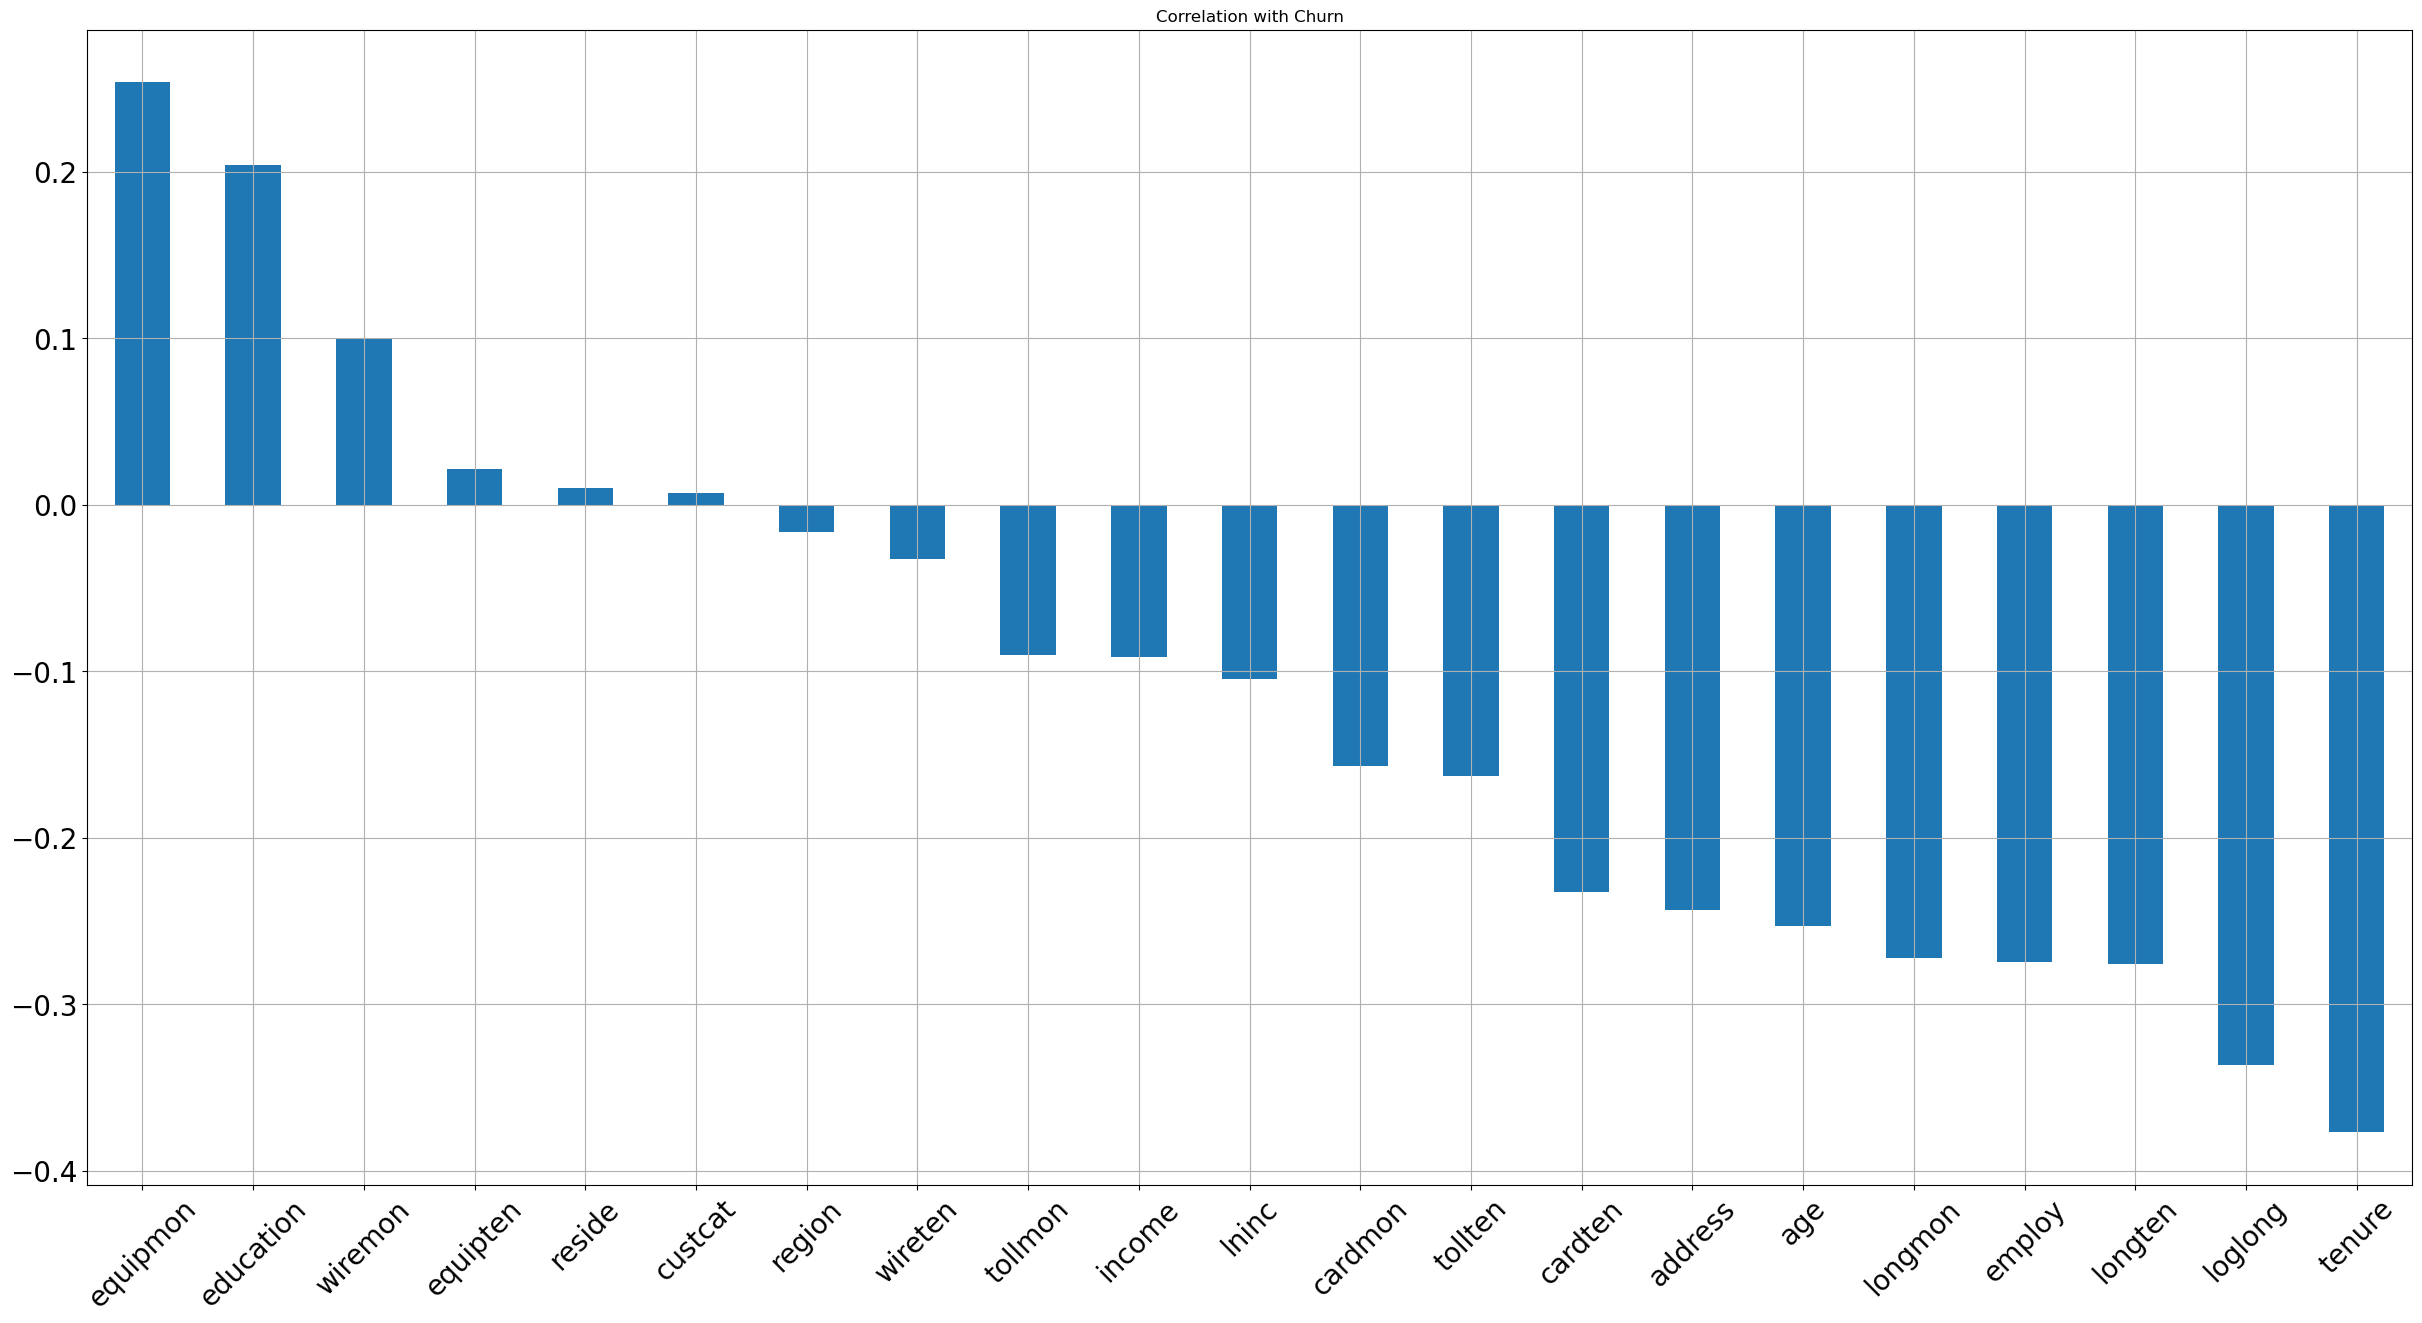

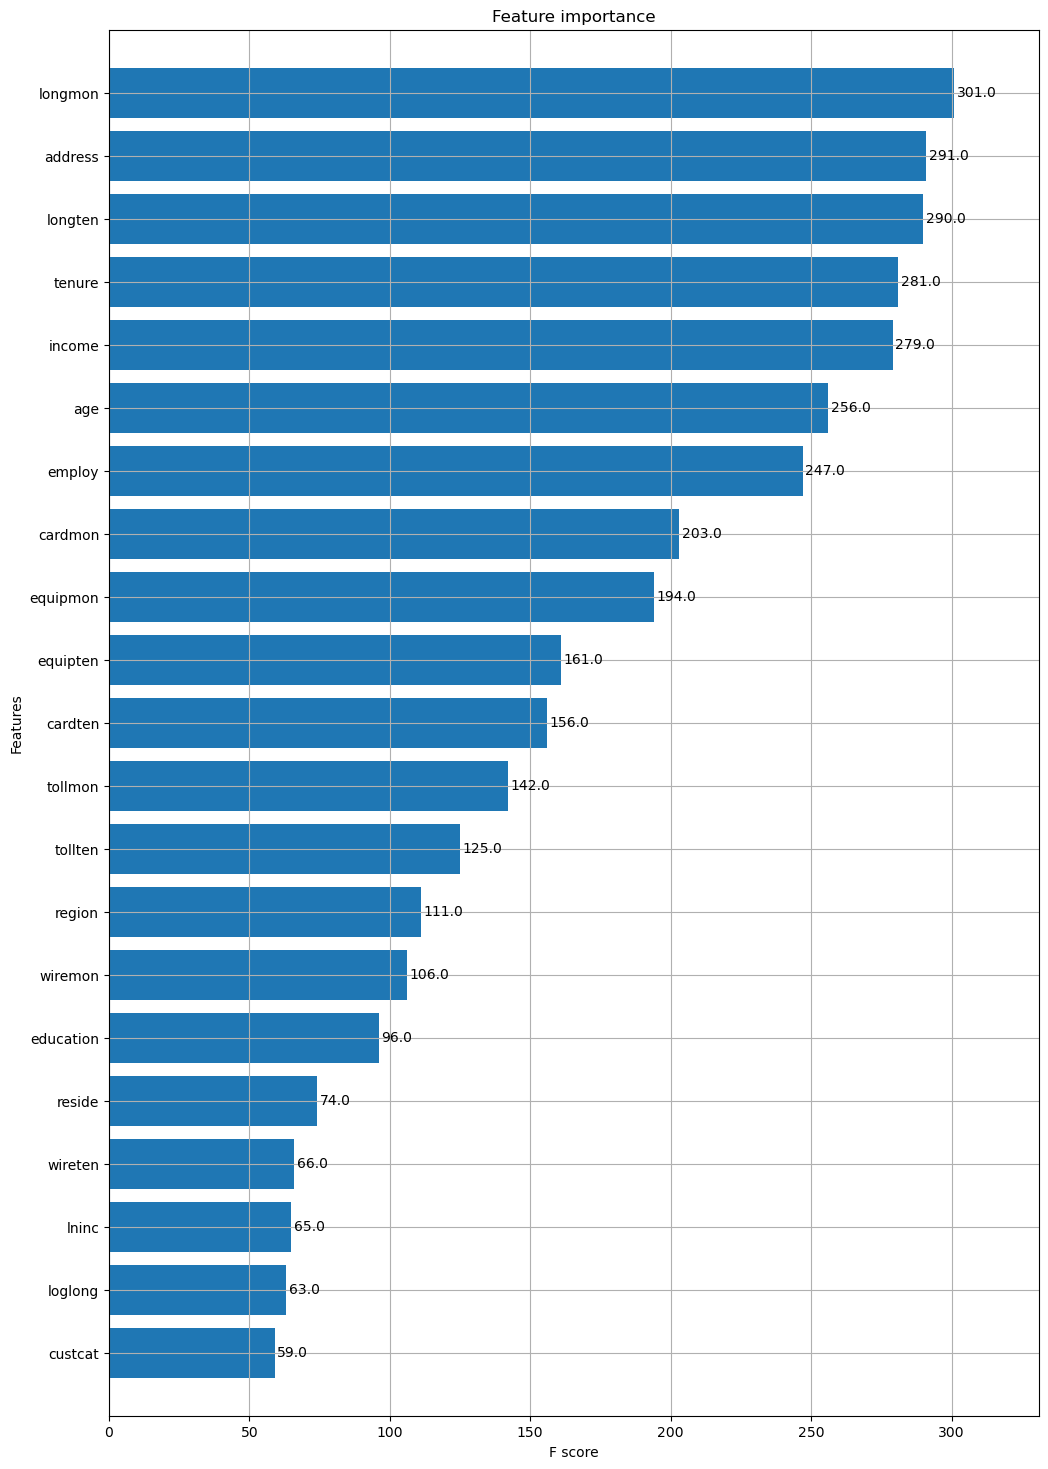

In [18]:
#Plot bar graph
df3.corrwith(df['unsubscribe']).sort_values(ascending = False).plot.bar(
    figsize = (30, 15), title = 'Correlation with Churn', fontsize= 20, 
    rot = 45, grid = True)

clf = xgb.XGBClassifier(max_depth = 7, n_estimators = 100, 
                        colsample_bytree = 0.8, subsample = 0.8, 
                        nthread = 10, learning_rate = 0.05)
clf.fit(df3, y)

# plot the important features #
fig, ax = plt.subplots(figsize = (12,18))
xgb.plot_importance(clf, max_num_features = 50, height = 0.8, ax = ax)
plt.show()

In [19]:
#Data Splitting with Stratified Sampling:
xtrain, xvalid, ytrain, yvalid = train_test_split(df3, y, stratify = y, 
                                                  random_state=1, 
                                                  test_size = 0.2, 
                                                  shuffle = True)
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(800, 21) (200, 21) (800,) (200,)


In [20]:
#XGBoostClassifier Training and Evaluation:
clf = xgb.XGBClassifier(max_depth = 7, n_estimators = 100, 
                        colsample_bytree = 0.8, subsample = 0.8, 
                        learning_rate = 0.05)

clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score=",accuracy_score(yvalid, predictions))

accuracy_score= 0.79


In [21]:
#XGBoostClassification Report:
from sklearn.metrics import classification_report
print(classification_report(yvalid, predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       145
           1       0.66      0.49      0.56        55

    accuracy                           0.79       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.78      0.79      0.78       200

